In [1]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install matplotlib
!pip install albumentations

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**SETTING UP AND GETTING DATA**

In [2]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
#importing necessary libraries
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt


In [4]:
gpus=tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)


In [5]:
tf.config.list_physical_devices('GPU')


[]

In [ ]:
# folder_path = '/content/drive/MyDrive/dataa/images/'

In [ ]:
# file_pattern = folder_path + '*.jpg'

In [6]:
images =tf.data.Dataset.list_files('/content/drive/MyDrive/dataog/images/*.png',shuffle=False)

In [7]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/dataog/images/26.png'

In [8]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.image.decode_jpeg(byte_img, channels=3)
    return img

In [9]:
from PIL import Image
import os

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/dataog/images'

# Specify the target size
target_size = (300, 300)

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Loop through the image files and resize each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    with Image.open(image_path) as img:
        img = img.resize(target_size)
        img.save(image_path)

print("All images resized to (300, 300) pixels.")


All images resized to (300, 300) pixels.


In [11]:
from PIL import Image
import os

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/dataaa_f/train/images'

# Specify the target size
target_size = (300, 300)

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Loop through the image files and resize each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    with Image.open(image_path) as img:
        img = img.resize(target_size)
        img.save(image_path)

print("All images resized to (300, 300) pixels.")

All images resized to (300, 300) pixels.


In [12]:
from PIL import Image
import os

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/dataaa_f/test/images'

# Specify the target size
target_size = (300, 300)

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Loop through the image files and resize each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    with Image.open(image_path) as img:
        img = img.resize(target_size)
        img.save(image_path)

print("All images resized to (300, 300) pixels.")

All images resized to (300, 300) pixels.


In [13]:
from PIL import Image
import os

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/dataaa_f/val/images'

# Specify the target size
target_size = (300, 300)

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Loop through the image files and resize each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    with Image.open(image_path) as img:
        img = img.resize(target_size)
        img.save(image_path)

print("All images resized to (300, 300) pixels.")

All images resized to (300, 300) pixels.


**Review Dataset and Build Image Loading Function**

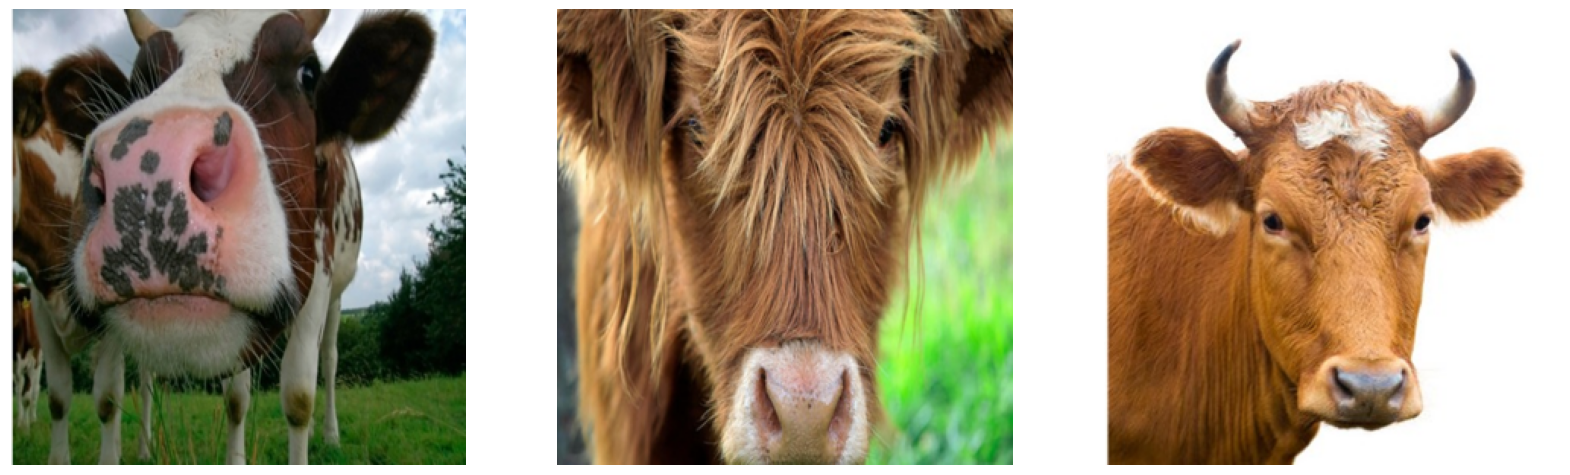

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Create a dataset of file paths without shuffling
images = tf.data.Dataset.list_files('/content/drive/MyDrive/dataog/images/*png', shuffle=False)

# Function to decode bytes to strings
def decode_to_string(byte_path):
    return tf.strings.as_string(byte_path)

# Convert byte file paths to strings
images = images.map(decode_to_string)

# Define the load_image function
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.image.decode_png(byte_img, channels=3)
    return img

# Map the load_image function to load and preprocess the images
images = images.map(load_image)

# Display the images using Matplotlib
image_generator = images.batch(3).as_numpy_iterator()
plot_images = image_generator.next()

fig, ax = plt.subplots(ncols=3, figsize=(20, 20))  # Adjust the number of columns and figsize as needed
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
    ax[idx].axis('off')  # Turn off axis labels for cleaner visualization

plt.show()


In [15]:
images.as_numpy_iterator().next()


array([[[255, 255, 255],
        [211, 219, 224],
        [133, 151, 162],
        ...,
        [195, 218, 241],
        [198, 220, 243],
        [201, 223, 246]],

       [[255, 255, 255],
        [212, 221, 225],
        [135, 154, 164],
        ...,
        [206, 228, 250],
        [206, 228, 250],
        [208, 230, 253]],

       [[255, 255, 255],
        [213, 221, 226],
        [138, 157, 166],
        ...,
        [216, 235, 255],
        [214, 235, 255],
        [214, 236, 255]],

       ...,

       [[255, 255, 255],
        [165, 186, 169],
        [  8,  50,   4],
        ...,
        [ 21,  77,  12],
        [ 10,  66,   4],
        [ 10,  65,   4]],

       [[255, 255, 255],
        [168, 187, 168],
        [ 13,  53,   9],
        ...,
        [ 25,  80,  17],
        [ 14,  68,   8],
        [ 10,  66,   7]],

       [[255, 255, 255],
        [171, 188, 170],
        [ 16,  56,  12],
        ...,
        [ 27,  80,  19],
        [ 14,  68,   8],
        [ 11,  63,   6]]

In [16]:
type(images)


tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
# import tensorflow as tf

# # Define a function to load and preprocess the image
# def load_image(file_path):
#     byte_img = tf.io.read_file(file_path)
#     img = tf.io.decode_image(byte_img, channels=3)
#     img = tf.image.resize(img, [256, 256])
#     img.set_shape([256, 256, 3])  # Set the shape explicitly
#     return img

# # Create a dataset of file paths
# image_paths = tf.data.Dataset.list_files('/content/drive/MyDrive/data/images/*', shuffle=False)

# # Filter for images that TensorFlow supports (JPEG, PNG, GIF, BMP)
# image_paths = image_paths.filter(
#     lambda x: tf.strings.regex_full_match(x, r'.*\.(jpe?g|png|gif|bmp)$')
# )

# # Map the loading function to the dataset
# images = image_paths.map(load_image)

# # Check the data type of the dataset
# print(type(images))  # This should be <class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>

# # Create an image generator for batching
# image_generator = images.batch(4).as_numpy_iterator()

# # Retrieve the next batch of images
# plot_images = next(image_generator)

# # Now, you can display or work with 'plot_images'


In [ ]:
# import os

# # Define the source directory for image and label files
# source_root = '/content/drive/MyDrive/data'

# # Specify the subfolders for which you want to move labels
# folders = ['train', 'test', 'val']

# for folder in folders:
#     image_folder = os.path.join(source_root, folder, 'images')
#     label_folder = os.path.join(source_root, folder, 'labels')
#     for image_file in os.listdir(image_folder):
#         image_name, _ = os.path.splitext(image_file)
#         label_file = image_name + '.json'
#         source_label_path = os.path.join(label_folder, label_file)
#         if os.path.exists(source_label_path):
#             destination_label_path = os.path.join(source_root, folder, 'labels', label_file)
#             os.replace(source_label_path, destination_label_path)


**Apply Image Augmentation on Images and Labels using Albumentations**

In [17]:
import cv2
import albumentations as alb
import os

In [18]:
augmentor = alb.Compose([alb.RandomCrop(width=300, height=300),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [19]:
img = cv2.imread(os.path.join('data','train', 'images','/content/drive/MyDrive/dataog/images/26.png'))

In [20]:
with open(os.path.join('data', 'train', 'labels', '/content/drive/MyDrive/dataog/test/labels/26.json'), 'r') as f:
    label = json.load(f)

In [21]:
label['shapes'][0]['points']

[[51.6025641025641, 86.53846153846153],
 [145.19230769230768, 188.46153846153845]]

In [22]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [23]:
coords

[51.6025641025641, 86.53846153846153, 145.19230769230768, 188.46153846153845]

In [24]:
coords = list(np.divide(coords, [300,300,300,300]))

In [25]:
coords

[0.172008547008547,
 0.28846153846153844,
 0.4839743589743589,
 0.6282051282051282]

In [26]:
bboxes = [coords]
crop_height,crop_width=300,300
if crop_height<img.shape[0] and crop_width<=img.shape[1]:
  augmented = augmentor(image=img, bboxes=[coords], class_labels=['muzzle'])
else:
  augmented = {'image': img, 'bboxes': bboxes, 'class_labels': ['muzzle']}

In [27]:
augmented['bboxes'][0][2:]

[0.4839743589743589, 0.6282051282051282]

In [28]:
augmented['bboxes']

[[0.172008547008547,
  0.28846153846153844,
  0.4839743589743589,
  0.6282051282051282]]

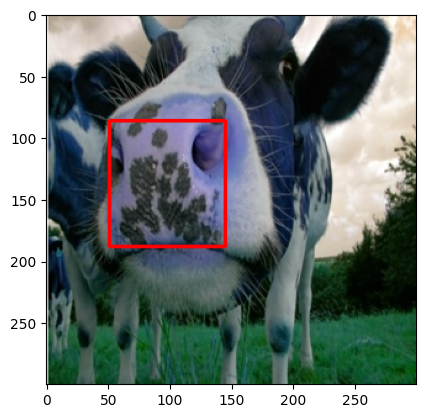

In [29]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [300,300]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [300,300]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

**Build and Run Augmentation Pipeline**

In [ ]:
import cv2
import os
import json
import numpy as np

# ... (import other necessary libraries)

# Loop through the partitions (train, test, val)
for partition in ['train', 'test', 'val']:
    images_dir = os.path.join('/content/drive/MyDrive/dataog', partition, 'images')
    labels_dir = os.path.join('/content/drive/MyDrive/dataog', partition, 'labels')
    augment_dir = os.path.join('/content/drive/MyDrive/aug_f', partition)

    for image in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image)
        label_path = os.path.join(labels_dir, f'{os.path.splitext(image)[0]}.json')

        if not os.path.exists(label_path):
            coords = [0, 0, 0.00001, 0.00001]
        else:
            with open(label_path, 'r') as f:
                label = json.load(f)
                coords = label['shapes'][0]['points'][0] + label['shapes'][0]['points'][1]
                coords = list(np.divide(coords, [300, 300, 300, 300]))

        try:
            for x in range(20):
                augmented = augmentor(image=cv2.imread(image_path), bboxes=[coords], class_labels=['muzzle'])
                augmented_image = augmented['image']

                augmented_image_path = os.path.join(augment_dir, 'images', f'{os.path.splitext(image)[0]}.{x}.jpg')
                cv2.imwrite(augmented_image_path, augmented_image)

                annotation = {}
                annotation['image'] = image

                if not os.path.exists(label_path) or len(augmented['bboxes']) == 0:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0
                else:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = 1

                augmented_label_path = os.path.join(augment_dir, 'labels', f'{os.path.splitext(image)[0]}.{x}.json')
                with open(augmented_label_path, 'w') as f:
                    json.dump(annotation, f)

                print(f"Augmented image: {augmented_image_path}")

        except Exception as e:
            print(f"Error augmenting image {image}: {str(e)}")

print("Augmentation complete.")


Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.0.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.1.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.2.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.3.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.4.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.5.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.6.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.7.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.8.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.9.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.10.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.11.jpg
Augmented image: /content/drive/MyDrive/aug_f/train/images/image 2.12.jpg
Augmented image: /content/drive/MyDrive/aug_f/tr

In [30]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_f/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (200,200)))
train_images = train_images.map(lambda x: x/255)

In [31]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_f/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (200,200)))
test_images = test_images.map(lambda x: x/255)

In [32]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_f/val/images/*jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (200,200)))
val_images = val_images.map(lambda x: x/255)

In [33]:
train_images.as_numpy_iterator().next()

array([[[6.87500000e-01, 7.28431344e-01, 5.76225519e-01],
        [2.85294116e-01, 3.31372559e-01, 1.49019614e-01],
        [2.68872559e-01, 3.16176474e-01, 1.13480389e-01],
        ...,
        [9.55882370e-02, 2.50000004e-02, 0.00000000e+00],
        [9.11764726e-02, 2.05882359e-02, 0.00000000e+00],
        [1.06617644e-01, 3.60294133e-02, 0.00000000e+00]],

       [[6.60294116e-01, 7.03431368e-01, 5.39460778e-01],
        [2.47058824e-01, 2.93137252e-01, 1.10049017e-01],
        [1.96078435e-01, 2.44117647e-01, 4.36274521e-02],
        ...,
        [1.16911761e-01, 4.11764719e-02, 0.00000000e+00],
        [1.13235295e-01, 3.67647074e-02, 0.00000000e+00],
        [1.08823530e-01, 3.23529430e-02, 2.20588245e-03]],

       [[6.46323502e-01, 6.93627477e-01, 5.07107854e-01],
        [2.44852945e-01, 2.93627441e-01, 8.72549042e-02],
        [2.05392152e-01, 2.53921568e-01, 2.27941182e-02],
        ...,
        [1.26225486e-01, 5.09803928e-02, 7.35294132e-04],
        [1.41176477e-01, 6.27

In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/aug_f/train/images"
image_extensions = [".png", ".jpeg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

**Preparation of Labels**

In [34]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']


In [35]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_f/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [36]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_f/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [37]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_f/val/labels/*json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [38]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2576, 0.2158, 0.454 , 0.452 ], dtype=float16))

**Combine Label and Image Samples**

In [39]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(360, 360, 160, 160, 120, 120)

In [40]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(80)
train = train.batch(30)
train = train.prefetch(4)


In [41]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(80)
test = test.batch(8)
test = test.prefetch(4)


In [42]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(80)
val = val.batch(8)
val = val.prefetch(4)


In [43]:
train.as_numpy_iterator().next()[1]


(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.546 , 0.2158, 0.7427, 0.452 ],
        [0.3364, 0.2715, 0.502 , 0.4082],
        [0.4978, 0.592 , 0.6636, 0.7285],
        [0.2715, 0.1742, 0.4155, 0.4402],
        [0.5845, 0.1742, 0.7285, 0.4402],
        [0.2715, 0.56  , 0.4155, 0.8257],
        [0.4124, 0.295 , 0.4946, 0.4016],
        [0.2715, 0.1742, 0.4155, 0.4402],
        [0.4978, 0.2715, 0.6636, 0.4082],
        [0.2576, 0.548 , 0.454 , 0.784 ],
        [0.4978, 0.592 , 0.6636, 0.7285],
        [0.2715, 0.56  , 0.4155, 0.8257],
        [0.4124, 0.295 , 0.4946, 0.4016],
        [0.4712, 0.3665, 0.5684, 0.468 ],
       

In [44]:
data_samples = train.as_numpy_iterator()


In [45]:
res = data_samples.next()


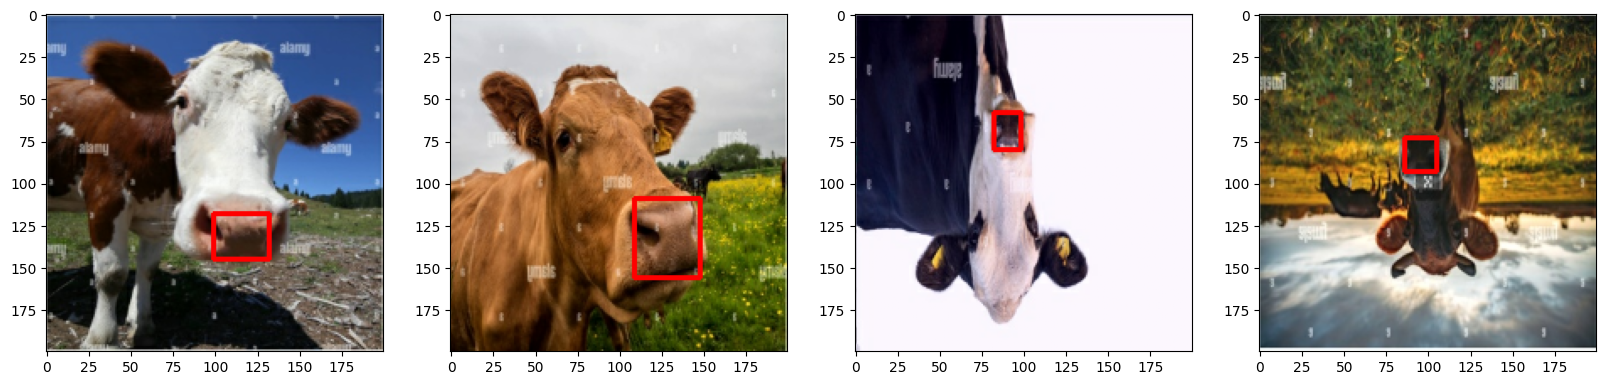

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # Ensure the image values are in the [0, 1] range
    sample_image = np.clip(sample_image, 0, 1)

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [200, 200]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [200, 200]).astype(int)),
                  (1, 0, 0), 2)

    ax[idx].imshow(sample_image)



**Build Deep Learning using the Functional API**

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [48]:
vgg = VGG16(include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [49]:
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [50]:
def build_model():
    input_layer = Input(shape=(200,200,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker


In [51]:
facetracker = build_model()


In [52]:
facetracker.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [53]:
X, y = train.as_numpy_iterator().next()


In [54]:
X.shape


(30, 200, 200, 3)

In [55]:

classes, coords = facetracker.predict(X)


1/1 [==============================] - 15s 15s/step


In [56]:
classes, coords

(array([[0.2730911 ],
        [0.24288666],
        [0.3542218 ],
        [0.29451346],
        [0.29448813],
        [0.35836825],
        [0.35138014],
        [0.24288666],
        [0.41883662],
        [0.26736215],
        [0.4072381 ],
        [0.29448813],
        [0.32073972],
        [0.26740944],
        [0.26740944],
        [0.2903316 ],
        [0.3526488 ],
        [0.37736884],
        [0.3211083 ],
        [0.32256737],
        [0.24288666],
        [0.42209128],
        [0.38612217],
        [0.41883662],
        [0.41630036],
        [0.2903316 ],
        [0.2903316 ],
        [0.32256737],
        [0.3151993 ],
        [0.25874856]], dtype=float32),
 array([[0.80980635, 0.6479903 , 0.22859693, 0.6029554 ],
        [0.7528911 , 0.694198  , 0.27904433, 0.63127905],
        [0.7591176 , 0.6570998 , 0.25316465, 0.63919705],
        [0.7314429 , 0.64287186, 0.331202  , 0.6769608 ],
        [0.73611325, 0.6406369 , 0.33093464, 0.6823243 ],
        [0.8038159 , 0.61657923, 

**Define losses**

In [57]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [58]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
# Import the necessary modules
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define your learning rate schedule
initial_learning_rate = 0.0001
#lr_decay = 0.9  # Set your desired decay rate
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,  # Set the decay steps as needed
    decay_rate=lr_decay,
    staircase=True  # You can set this to False if you prefer a continuous decay
)

# Create the optimizer with the learning rate schedule
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [59]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [60]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [61]:
localization_loss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=19.003315>

In [62]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1458912>

In [63]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=19.003315>

**Train Neural Network**

In [64]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [65]:
model = FaceTracker(facetracker)


In [66]:
model.compile(opt, classloss, regressloss)


In [67]:
logdir='logs'

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
12/12 [==============================] - 691s 58s/step - total_loss: 3.5563 - class_loss: 0.3028 - regress_loss: 3.4050 - val_total_loss: 0.7574 - val_class_loss: 0.0662 - val_regress_loss: 0.7243
Epoch 2/5
12/12 [==============================] - 692s 58s/step - total_loss: 1.6300 - class_loss: 0.0293 - regress_loss: 1.6154 - val_total_loss: 0.5809 - val_class_loss: 0.0076 - val_regress_loss: 0.5772
Epoch 3/5
12/12 [==============================] - 725s 61s/step - total_loss: 1.2175 - class_loss: 0.0063 - regress_loss: 1.2144 - val_total_loss: 0.6938 - val_class_loss: 0.0043 - val_regress_loss: 0.6916
Epoch 4/5
12/12 [==============================] - 672s 57s/step - total_loss: 0.7755 - class_loss: 0.0028 - regress_loss: 0.7740 - val_total_loss: 1.2080 - val_class_loss: 0.0011 - val_regress_loss: 1.2074
Epoch 5/5
12/12 [==============================] - 687s 58s/step - total_loss: 0.4501 - class_loss: 0.0011 - regress_loss: 0.4495 - val_total_loss: 0.5894 - val_class_loss:

In [70]:
hist.history

{'total_loss': [1.92615807056427,
  1.5344911813735962,
  1.0635993480682373,
  0.8679764270782471,
  0.3552066683769226],
 'class_loss': [0.09989268332719803,
  0.012304027564823627,
  0.0055390894412994385,
  0.0014675376005470753,
  0.00030008592875674367],
 'regress_loss': [1.8762117624282837,
  1.528339147567749,
  1.060829758644104,
  0.8672426342964172,
  0.35505661368370056],
 'val_total_loss': [0.7573700547218323,
  0.5809378027915955,
  0.6937817335128784,
  1.207962989807129,
  0.5894177556037903],
 'val_class_loss': [0.066199392080307,
  0.007559690158814192,
  0.004285307135432959,
  0.001064843381755054,
  0.00015295820776373148],
 'val_regress_loss': [0.7242703437805176,
  0.5771579742431641,
  0.6916390657424927,
  1.2074306011199951,
  0.5893412828445435]}

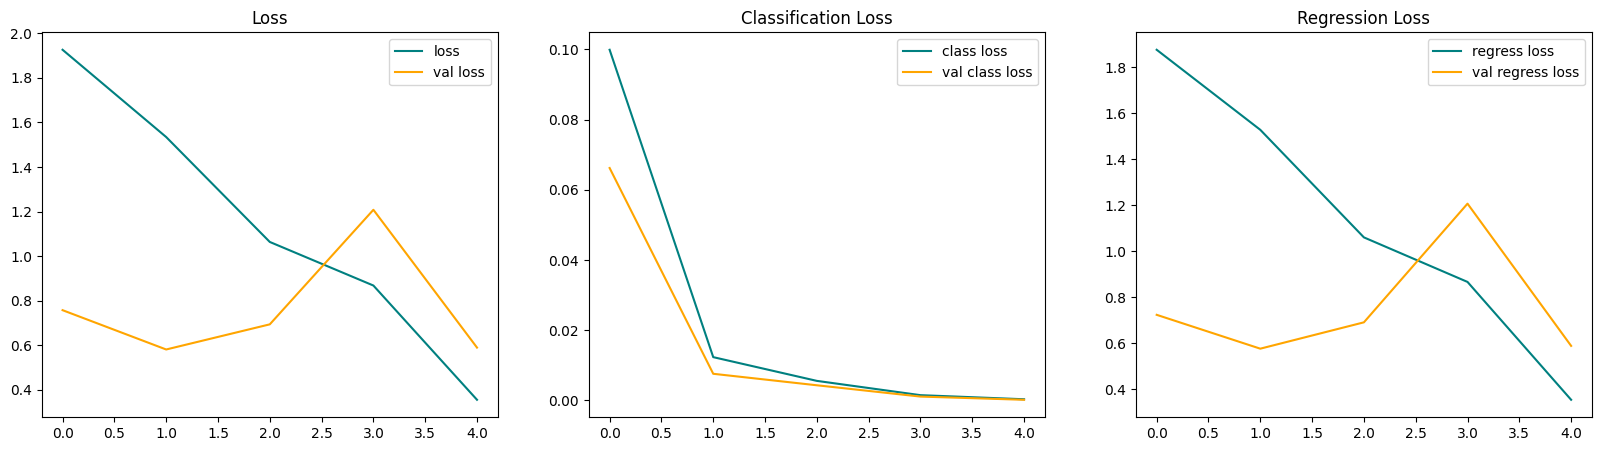

In [71]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

**Predictions**

In [76]:
test_data = test.as_numpy_iterator()

In [77]:
test_sample = test_data.next()

In [85]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 4s 4s/step


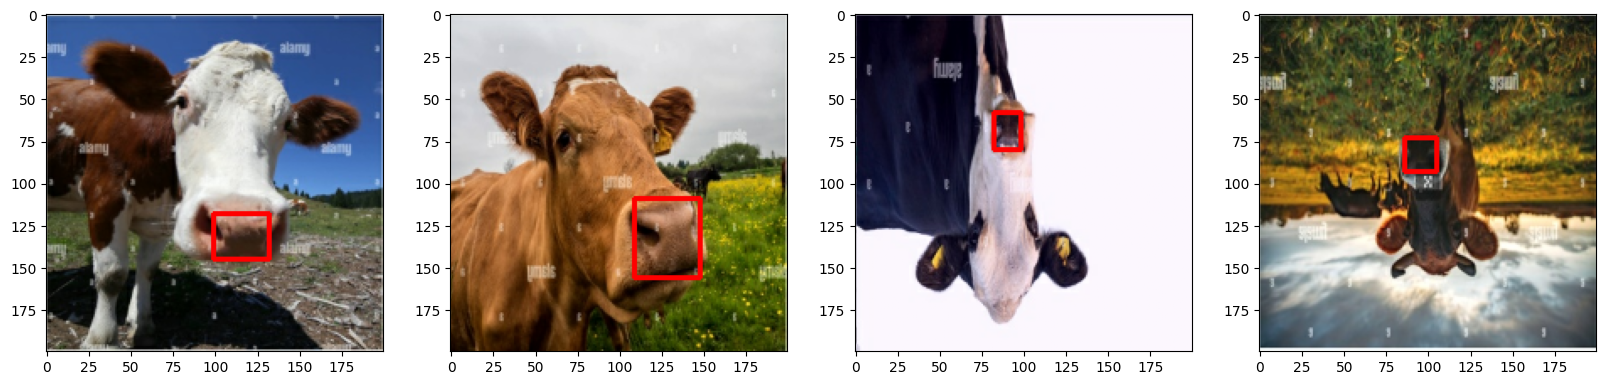

In [86]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx in range(3):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)



**Model Saved!**

In [80]:
from tensorflow.keras.models import load_model

In [81]:
facetracker.save('facetracker.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
facetracker = load_model('facetracker.h5')